In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mmmars/mars_for_students.npz


# Importing libraries

In [ ]:
import numpy as np
import os

import tensorflow as tf
import keras as tfk
from keras.layers import Input, Dense, Dropout, Lambda
from keras import layers as tfkl
import keras_cv

print(f"Tensorflow version -> {tf.__version__}")
print(f"Keras version -> {tfk.__version__}")

Tensorflow version -> 2.16.1
Keras version -> 3.3.3


In [ ]:
# Set seed for reproducibility

seed = 42
# Import necessary libraries

import os
from time import sleep


# Import necessary modules
import logging
import random
import numpy as np

# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Import other libraries
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import ImageGrid
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
from PIL import Image


# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

# Load data

In [ ]:
data = np.load("/kaggle/input/mmmars/mars_for_students.npz")

training_set = data["training_set"]

X_train = training_set[:, 0]
y_train = training_set[:, 1]
X_test = data["test_set"]


print(f"Training X shape: {X_train.shape}")
print(f"Training y shape: {y_train.shape}")
print(f"Test X shape: {X_test.shape}")

Training X shape: (2615, 64, 128)
Training y shape: (2615, 64, 128)
Test X shape: (10022, 64, 128)


# Inspect data

## Original images



### Note: the images are in *grey scale* (as we can see in the dataset description).

### An image in gray scale consists of various shades of gray, ranging from black to white, with intermediate tones of gray. It lacks saturated colors like red, blue, or green. Each pixel in a grayscale image represents a level of brightness, where:



* White is the maximum brightness,

* Black is the minimum brightness,

* Gray tones represent intermediate values.



### grayscale images contain only varying intensities of light and dark, without any color.

In [ ]:
print(f"Shape of a single image: {X_train[0].shape}")

Shape of a single image: (64, 128)


In [ ]:
X_train[0] # we can see we don't have the 3 channels

array([[81., 86., 86., ..., 82., 83., 83.],
       [84., 85., 81., ..., 77., 77., 80.],
       [85., 85., 84., ..., 61., 65., 71.],
       ...,
       [69., 73., 76., ..., 66., 65., 63.],
       [74., 77., 78., ..., 64., 63., 63.],
       [71., 74., 76., ..., 65., 66., 70.]])

In [ ]:
y_train[0] # we are in an image segmentation problem: each pixel is labelled with a number 0-4 that states its belonging to a class

array([[2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       ...,
       [2., 2., 2., ..., 0., 0., 0.],
       [2., 2., 2., ..., 0., 0., 0.],
       [2., 2., 2., ..., 0., 0., 0.]])

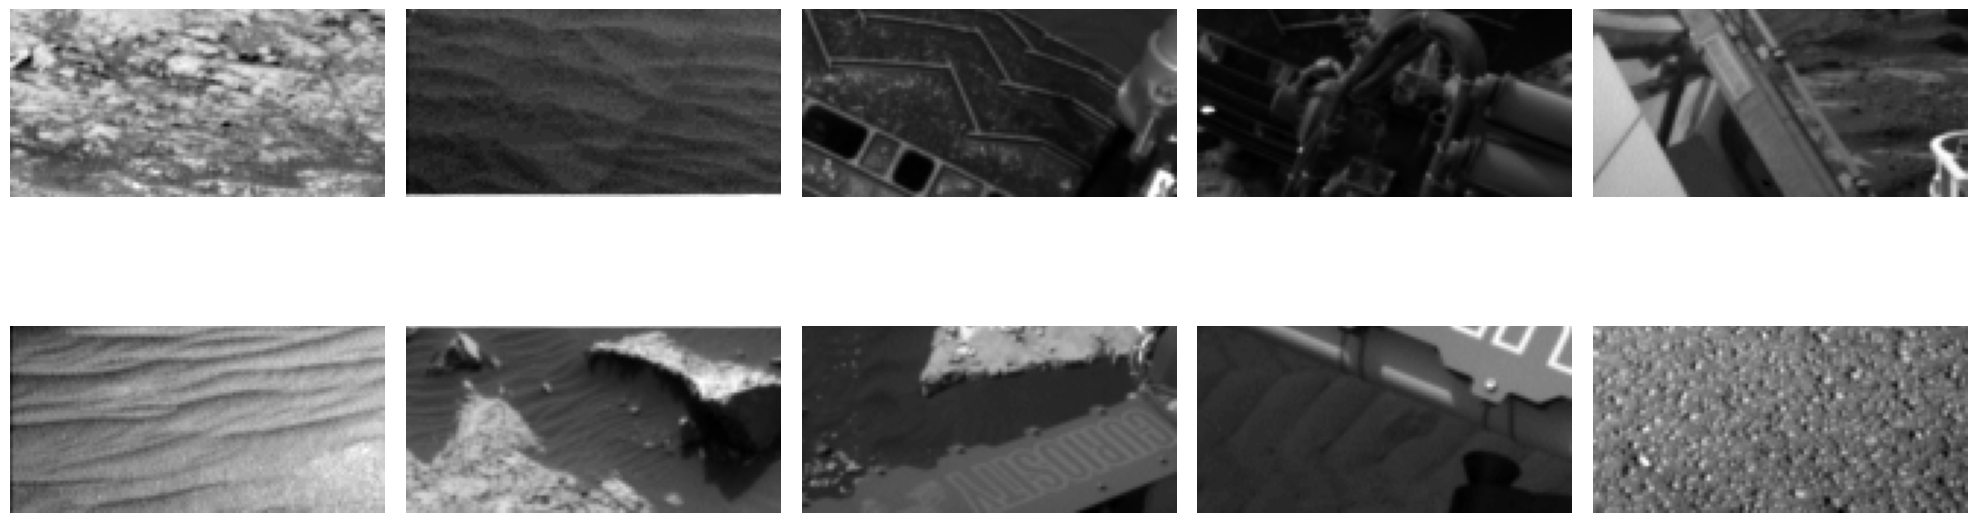

In [ ]:
# Numero di immagini da visualizzare per capire di cosa parliamo

num_img = 10  # Numero totale di immagini
num_cols = 5  # Numero di immagini per riga



# Creazione della griglia con 4 righe e 5 colonne
fig, axes = plt.subplots(2, num_cols, figsize=(20, 8))



# Ciclo per visualizzare le immagini
for i in range(num_img):
    row = i // num_cols  # Calcola la riga
    col = i % num_cols   # Calcola la colonna
    ax = axes[row, col]  # Seleziona l'asse corretto
    image = X_train[i]   # Estrazione immagine
    ax.imshow(image, cmap='gray')  # Display images in greyscale as they are
    ax.axis('off')  # Rimuove gli assi



plt.tight_layout()  # Riduce gli spazi tra le immagini
plt.show()

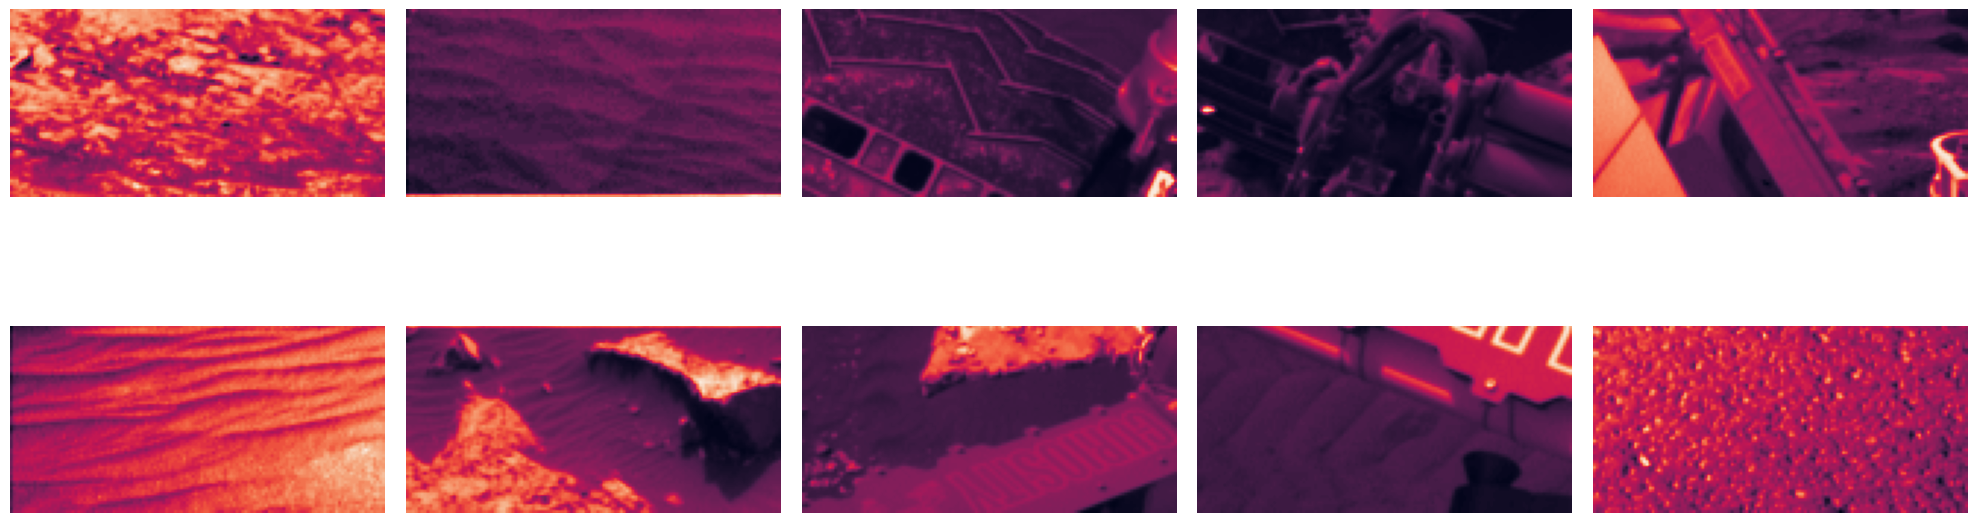

In [ ]:
# Numero di immagini da visualizzare per capire di cosa parliamo

num_img = 10  # Numero totale di immagini
num_cols = 5  # Numero di immagini per riga



# Creazione della griglia

fig, axes = plt.subplots(2, num_cols, figsize=(20, 8))



# Ciclo per visualizzare le immagini

for i in range(num_img):
    row = i // num_cols  # Calcola la riga
    col = i % num_cols   # Calcola la colonna
    ax = axes[row, col]  # Seleziona l'asse corretto
    image = X_train[i]   # Estrazione immagine
    ax.imshow(image)     # Note here we don't have cmap='gray'
    ax.axis('off')       # Rimuove gli assi



plt.tight_layout()  # Riduce gli spazi tra le immagini
plt.show()

## Masks



### As above for the original images, they are first represented in grey scale (original format)

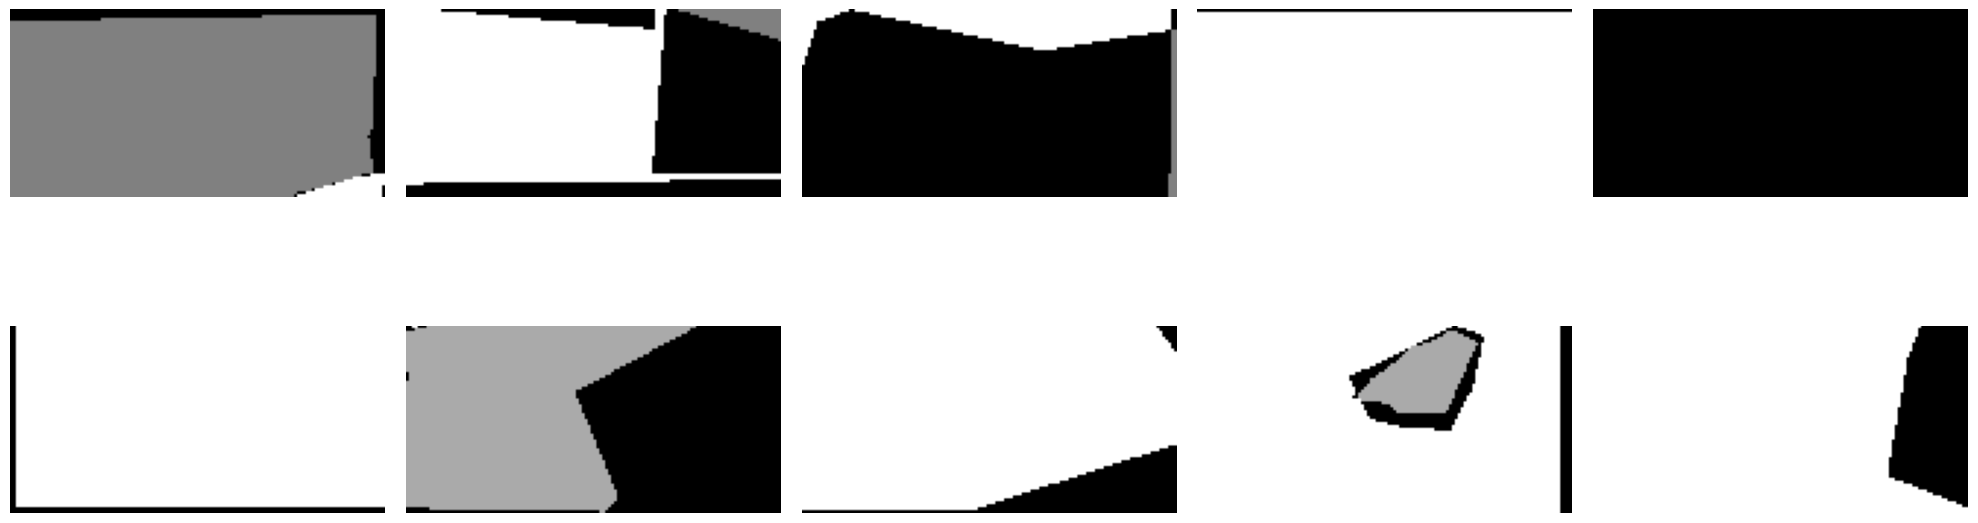

In [ ]:
# Numero di maschere da visualizzare

num_img = 10  # Numero totale di maschere
num_cols = 5  # Numero di maschere per riga



# Creazione della griglia

fig, axes = plt.subplots(2, num_cols, figsize=(20, 8))



# Ciclo per visualizzare le maschere

for i in range(num_img):
    row = i // num_cols  # Calcola la riga
    col = i % num_cols   # Calcola la colonna
    ax = axes[row, col]  # Seleziona l'asse corretto
    mask = y_train[i]   # Estrazione maschera
    ax.imshow(mask, cmap='gray')  # Display clipped images
    ax.axis('off')  # Rimuove gli assi



plt.tight_layout()

plt.show()

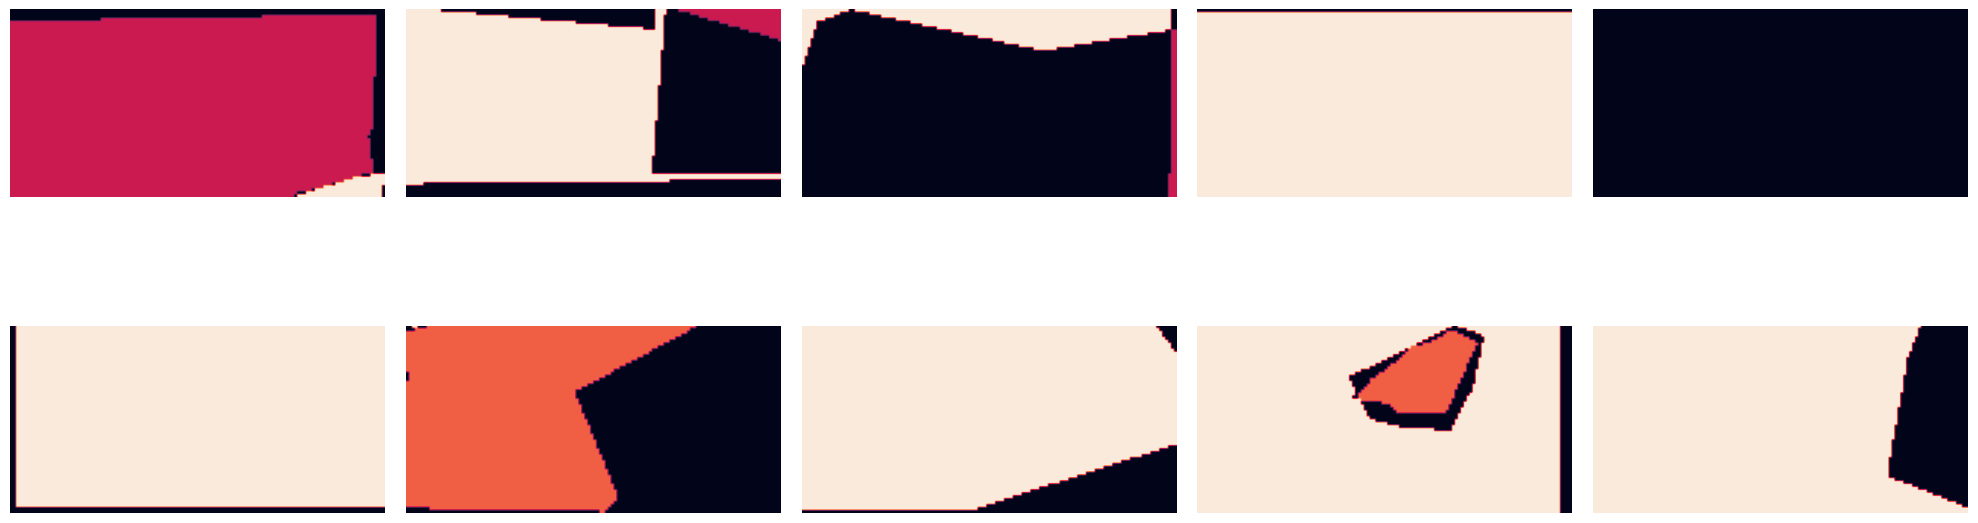

In [ ]:
# Numero di maschere da visualizzare

num_img = 10  # Numero totale di maschere
num_cols = 5  # Numero di maschere per riga

# Creazione della griglia

fig, axes = plt.subplots(2, num_cols, figsize=(20, 8))



# Ciclo per visualizzare le maschere

for i in range(num_img):
    row = i // num_cols  # Calcola la riga
    col = i % num_cols   # Calcola la colonna
    ax = axes[row, col]  # Seleziona l'asse corretto
    mask = y_train[i]   # Estrazione maschera
    ax.imshow(np.clip(mask, 0, 255))  # Display clipped images
    ax.axis('off')  # Rimuove gli assi



plt.tight_layout()
plt.show()

## Comparison

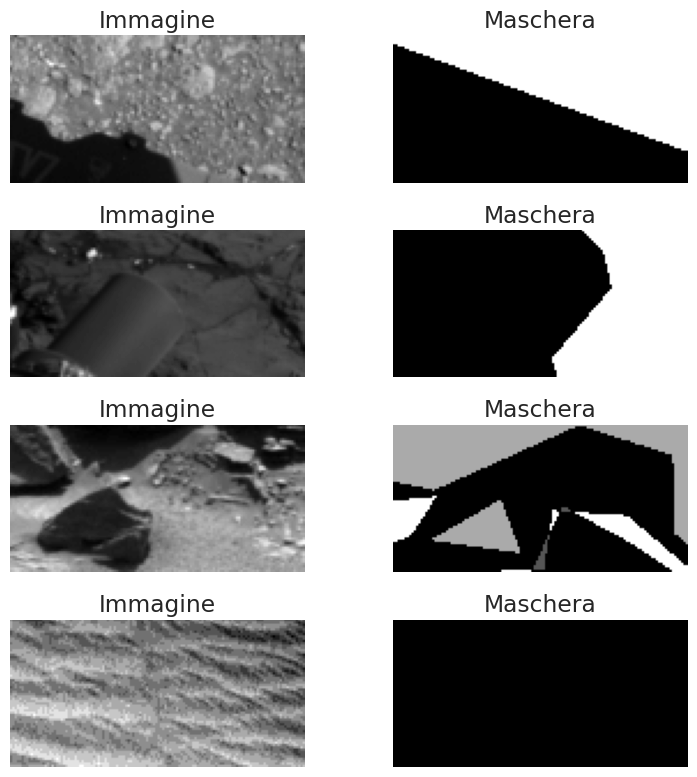

In [ ]:
# Numero di campioni da visualizzare
num_img = 4

# Creazione della figura con due colonne: immagine e maschera

fig, axes = plt.subplots(num_img, 2, figsize=(8, 2 * num_img))

for i in range(num_img):
    # Estrai l'immagine e la maschera
    image = training_set[i+10, 0]  # Immagine originale
    mask = training_set[i+10, 1]   # Maschera

    # Mostra l'immagine originale nella prima colonna

    ax_img = axes[i, 0]
    ax_img.imshow(image, cmap='gray')  # Mostra l'immagine originale
    ax_img.axis('off')
    ax_img.set_title("Immagine")

    # Mostra la maschera nella seconda colonna
    ax_mask = axes[i, 1]
    ax_mask.imshow(mask, cmap='gray')  # Mostra la maschera
    ax_mask.axis('off')
    ax_mask.set_title("Maschera")



plt.tight_layout()
plt.show()

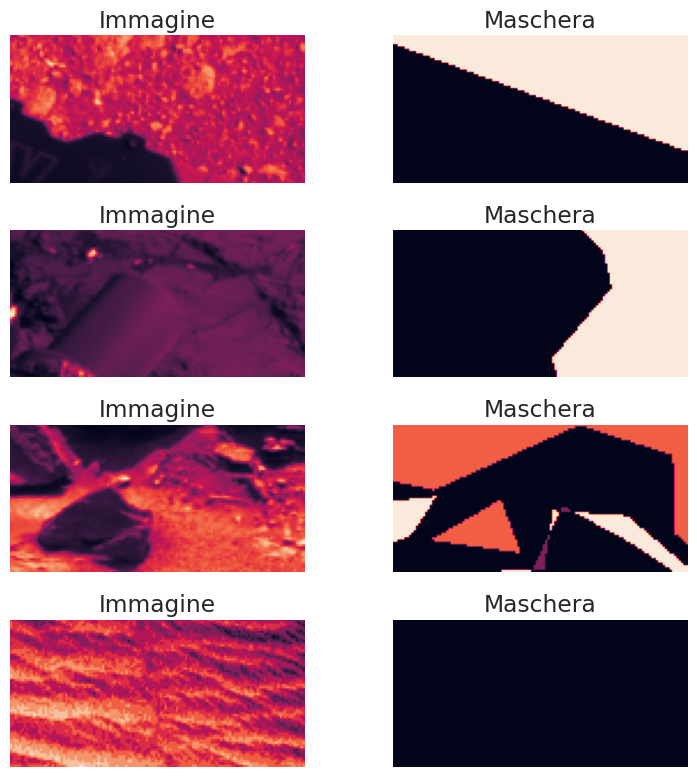

In [ ]:
# Numero di campioni da visualizzare

num_img = 4

# Creazione della figura con due colonne: immagine e maschera
fig, axes = plt.subplots(num_img, 2, figsize=(8, 2 * num_img))

for i in range(num_img):

    # Estrai l'immagine e la maschera
    image = training_set[i+10, 0]  # Immagine originale
    mask = training_set[i+10, 1]   # Maschera

    # Mostra l'immagine originale nella prima colonna

    ax_img = axes[i, 0]
    ax_img.imshow(image)  # Mostra l'immagine originale
    ax_img.axis('off')
    ax_img.set_title("Immagine")

    # Mostra la maschera nella seconda colonna
    ax_mask = axes[i, 1]
    ax_mask.imshow(mask)  # Mostra la maschera
    ax_mask.axis('off')
    ax_mask.set_title("Maschera")



plt.tight_layout()
plt.show()

## Understanding the mapping between color and classes

* 0: Background

* 1: Soil

* 2: Bedrock

* 3: Sand

* 4: Big rock


In [ ]:
# Dizionario delle classi

class_mapping = {
    0: "Background",
    1: "Soil",
    2: "Bedrock",
    3: "Sand",
    4: "Big Rock"
}

# Funzione per ottenere i nomi delle classi da una maschera

def get_class_names_from_mask(mask, mapping):
    unique_classes = np.unique(mask)                    # Trova le classi numeriche nella maschera
    class_names = [mapping[c] for c in unique_classes]  # Converte numeri in nomi
    return class_names

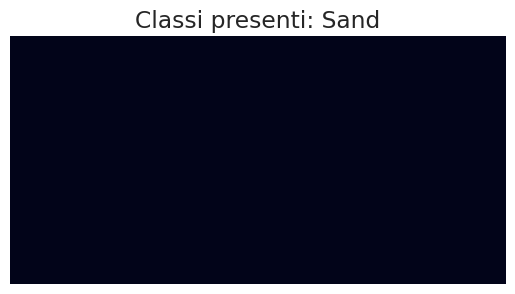

In [ ]:
# Visualizzare una maschera con i nomi delle classi

mask = training_set[13, 1]
class_names = get_class_names_from_mask(mask, class_mapping)

plt.imshow(mask)
plt.title(f"Classi presenti: {', '.join(class_names)}")
plt.axis('off')
plt.show()

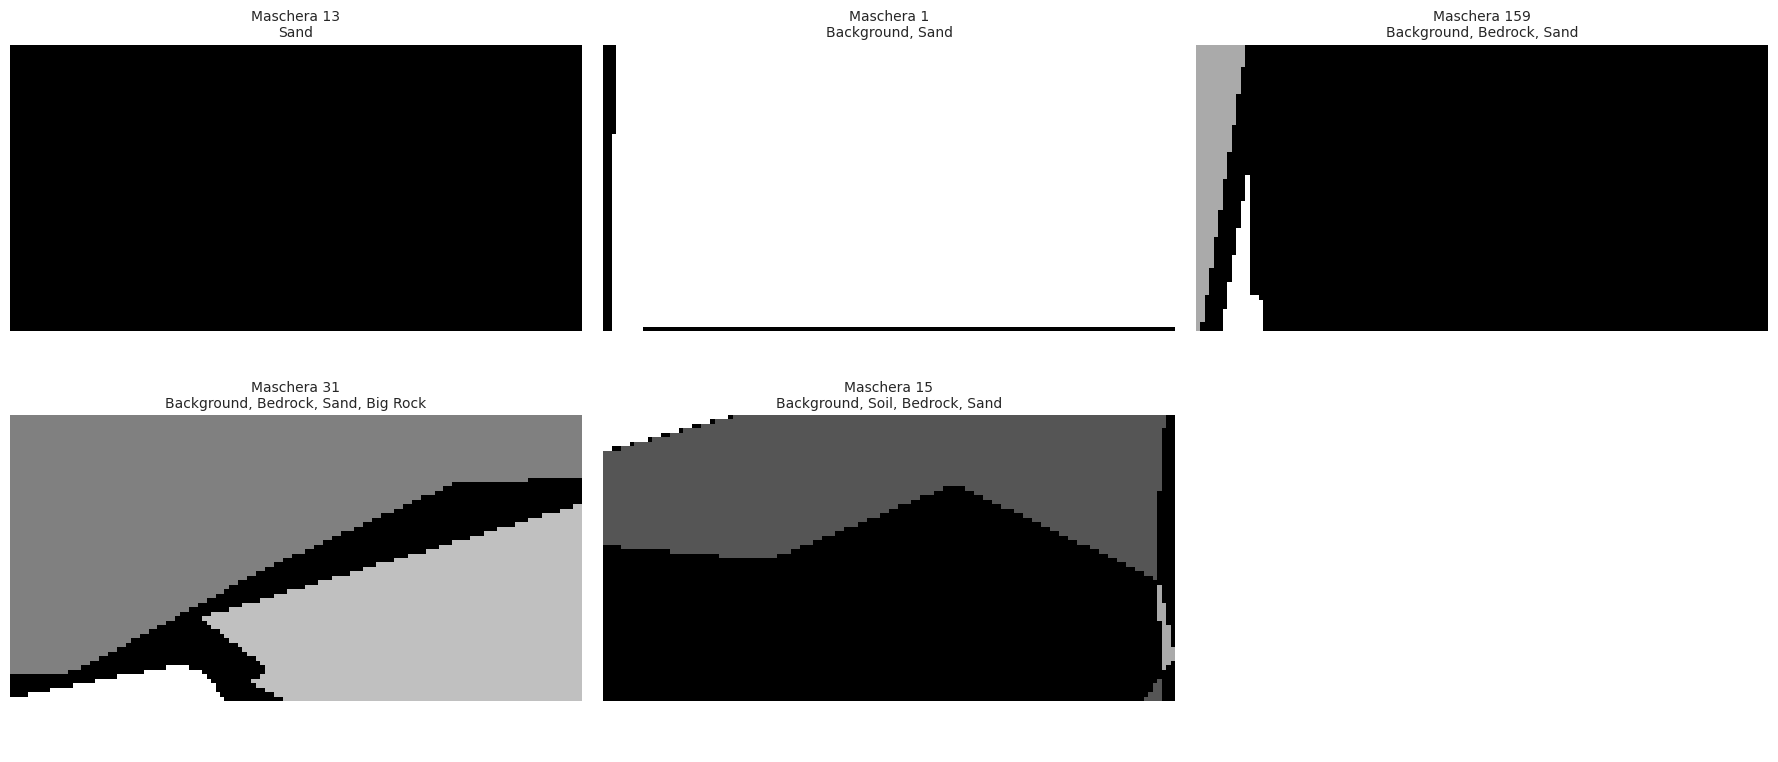

In [ ]:
# Indici delle maschere da mostrare (alcune immagini significative che mostrano praticamente tutte le maschere e colori)

indices = [13, 1, 159, 31, 15]

# Crea il grafico con 2 righe e 3 colonne

fig, axes = plt.subplots(2, 3, figsize=(18, 8))  # 2 righe, 3 colonne



# Piattaforma a 2 righe e 3 colonne (il massimo di maschere da visualizzare è 5)

for i, idx in enumerate(indices):
    row = i // 3  # Determina la riga (0 per la prima riga, 1 per la seconda)
    col = i % 3   # Determina la colonna (0, 1, 2)
    mask = training_set[idx, 1]  # Estrai la maschera
    class_names = get_class_names_from_mask(mask, class_mapping)  # Ottieni i nomi delle classi

    ax = axes[row, col]  # Ottieni l'asse corretto per la riga e colonna
    ax.imshow(mask, cmap='gray')  # Usa colormap 'jet' per evidenziare le classi
    ax.set_title(f"Maschera {idx}\n{', '.join(class_names)}", fontsize=10)
    ax.axis('off')  # Nascondi gli assi



axes[1, 2].axis('off')



# Migliora il layout

plt.tight_layout()
plt.show()

## Outliers research and removal

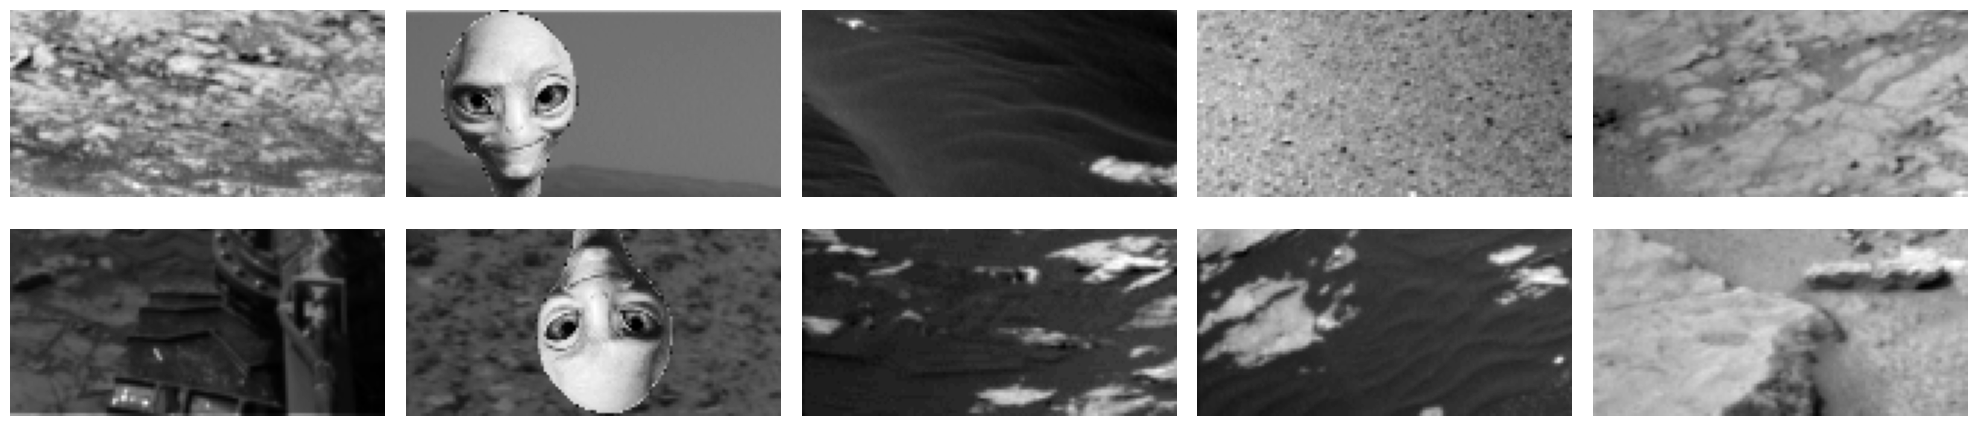

In [ ]:
# Numero di immagini da visualizzare

num_img = 10  # Numero totale di immagini
num_cols = 5  # Numero di immagini per riga

# Creazione della griglia con 2 righe e 5 colonne
fig, axes = plt.subplots(2, num_cols, figsize=(20, 5))

for i in range(num_img):
    row = i // num_cols  # Calcola la riga
    col = i % num_cols   # Calcola la colonna
    ax = axes[row, col]  # Seleziona l'asse corretto
    image = X_train[-i]  # Estrazione immagine
    ax.imshow(image, cmap='gray')  # Display  images
    ax.axis('off')  # Rimuove gli assi

plt.tight_layout()
plt.show()

### As we can see above, there are many peculiar aliens in the dataset that probably shouldn't be there: let's inspect the dataset to find them

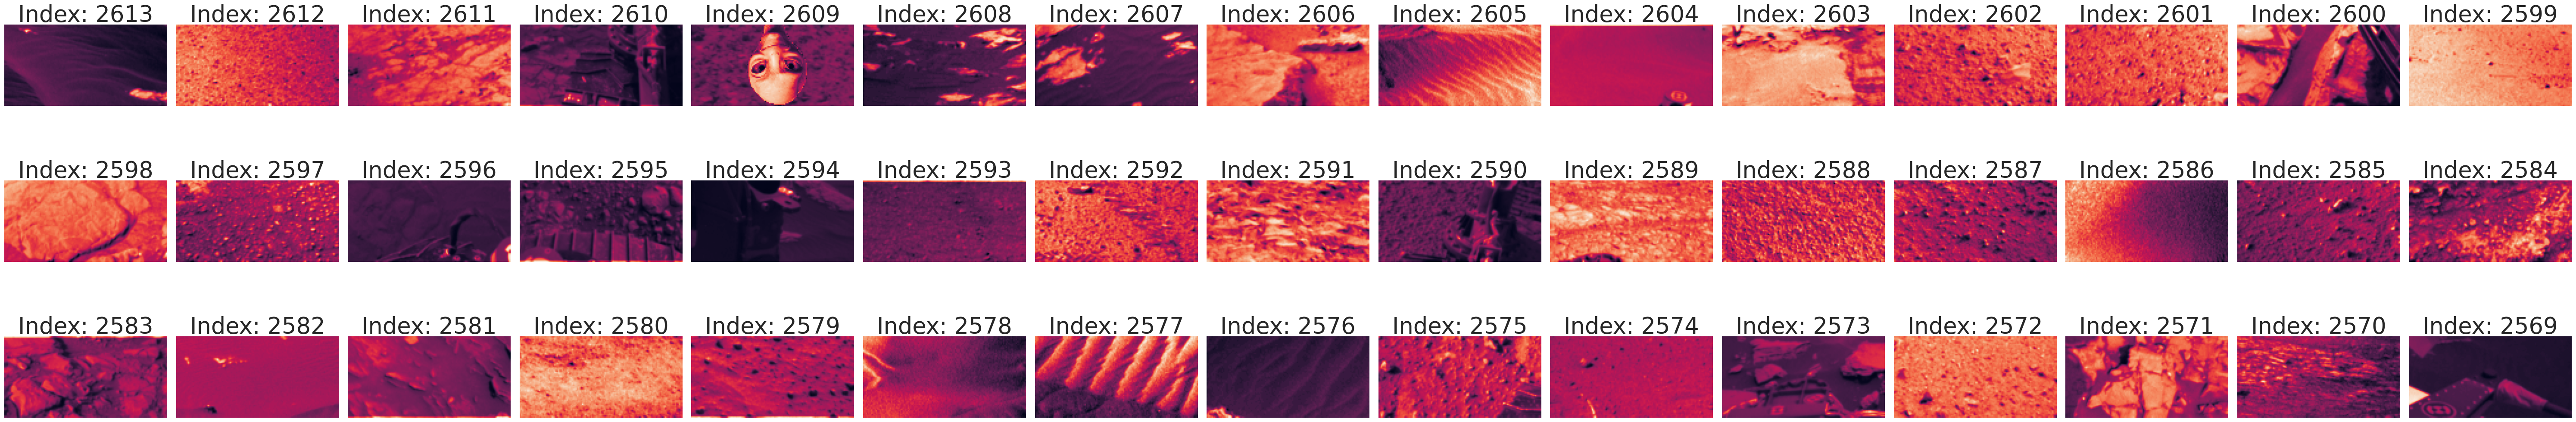

In [ ]:
num_img = 45  # Numero di immagini da visualizzare
num_cols = 15   # Numero di immagini per ogni riga

# Calcola il numero di righe necessario
num_rows = (num_img + num_cols - 1) // num_cols  # Arrotonda verso l'alto

# Creazione della griglia con il numero calcolato di righe e colonne
fig, axes = plt.subplots(num_rows, num_cols, figsize=(4 * num_cols, 4 * num_rows))

# Ciclo per visualizzare le immagini

for i in range(num_img):
    row = i // num_cols  # Calcola la riga
    col = i % num_cols   # Calcola la colonna
    ax = axes[row, col] if num_rows > 1 else axes[col]  # Gestisce una sola riga

    # Calcola l'indice dell'immagine
    index = 2614 - (i + 1)  # Indice decrescente partendo da 2614: len(X_train) - (i + 1)

    # Estrai e mostra l'immagine
    image = X_train[index]
    ax.imshow(np.clip(image, 0, 255))  # Visualizza l'immagine
    ax.axis('off')  # Rimuove gli assi

    # Aggiungi il titolo con l'indice
    ax.set_title(f"Index: {index}", fontsize=38, pad=5)  # Ridotto per spazio e leggibilità

# Nasconde gli assi extra nelle colonne vuote, se presenti
if num_img % num_cols != 0:
    for j in range(num_img, num_rows * num_cols):
        ax = axes[j // num_cols, j % num_cols] if num_rows > 1 else axes[j % num_cols]
        ax.axis('off')



plt.tight_layout()
plt.show()


### Let's visualize one of them

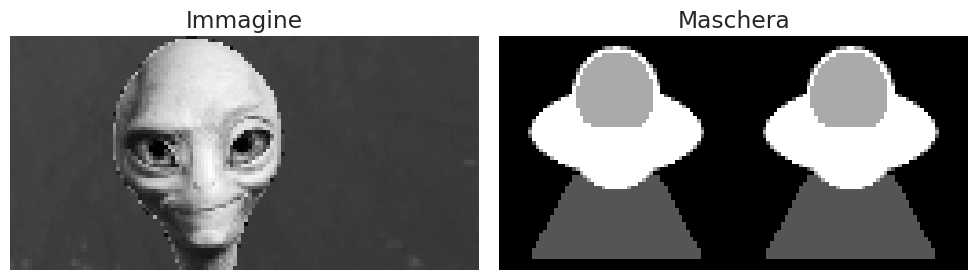

In [ ]:
# Indice dell'immagine da visualizzare
index = 1767

# Estrai l'immagine e la maschera
image = training_set[index, 0]  # Immagine originale
mask = training_set[index, 1]   # Maschera associata

# Creazione della figura con due colonne: immagine e maschera
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Mostra l'immagine originale nella prima colonna
axes[0].imshow(image, cmap='gray')  # Visualizza l'immagine originale
axes[0].axis('off')
axes[0].set_title("Immagine")

# Mostra la maschera nella seconda colonna
axes[1].imshow(mask, cmap='gray')
axes[1].axis('off')
axes[1].set_title("Maschera")

# Mostra il layout
plt.tight_layout()
plt.show()

### Remove them from the dataset

In [ ]:
indices_to_remove = [
    2614, 2609, 2561, 2535, 2522, 2453, 2414, 2372, 2365, 2361, 2350,
    2307, 2301, 2242, 2239, 2235, 2222, 2161, 2151, 2111, 2110, 2096,
    2086, 2002, 2000, 1979, 1975, 1942, 1925, 1889, 1834, 1816, 1813,
    1782, 1768, 1767, 1736, 1693, 1637, 1628, 1588, 1584, 1551, 1519, 1509, 1508, 1449, 1443, 1370, 1365,
    1324, 1306, 1262, 1261, 1258, 1248, 1247, 1224, 1194, 1177, 1125, 1119,
    1106, 1095, 1092, 1082, 1079, 1057, 1005, 971, 942, 909, 890, 863,
    849, 821, 820, 808, 802, 799, 747, 744, 741, 675, 669, 552, 536,
    461, 450, 426, 417, 412, 365, 348, 339, 313, 299, 289, 266, 217,
    210, 170, 156, 152, 147, 142, 139, 125, 79, 62
]

# Converte gli indici da rimuovere in un set per una ricerca più veloce
indices_to_remove_set = set(indices_to_remove)

# Filtra le immagini e le maschere. Stiamo tenendo quegli elementi di X_train e y_train che non sono in indices_to_remove_set
X_train_filtered = np.array([img for i, img in enumerate(X_train) if i not in indices_to_remove_set])
y_train_filtered = np.array([mask for i, mask in enumerate(y_train) if i not in indices_to_remove_set])

# Verifica
print(f"Dimensioni originali: {X_train.shape}, {y_train.shape}")
print(f"Dimensioni dopo il filtraggio: {X_train_filtered.shape}, {y_train_filtered.shape}")

Dimensioni originali: (2615, 64, 128), (2615, 64, 128)
Dimensioni dopo il filtraggio: (2505, 64, 128), (2505, 64, 128)


In [ ]:
# Reassign x_train e y_train just for semplicity
x_train = X_train_filtered
y_train = y_train_filtered

print(f"Dimensioni: {x_train.shape}, {y_train.shape}")

Dimensioni: (2505, 64, 128), (2505, 64, 128)


# Processing

## Train - val split

In [ ]:
# train validation split. We already have the test set so no reason to split also for that
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.20, random_state=42

)
# Controlla le dimensioni
print(f"x_train shape: {x_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

x_train shape: (2004, 64, 128)
x_val shape: (501, 64, 128)
y_train shape: (2004, 64, 128)
y_val shape: (501, 64, 128)


In [ ]:
x_train = (x_train / 255).astype('float32') # we don't touch the masks (y_train, y_val)
x_val = (x_val / 255).astype('float32')
x_test = X_test[..., np.newaxis] / 255.0
print("fatto")

fatto


## Inspect the train distribution to check class imbalance

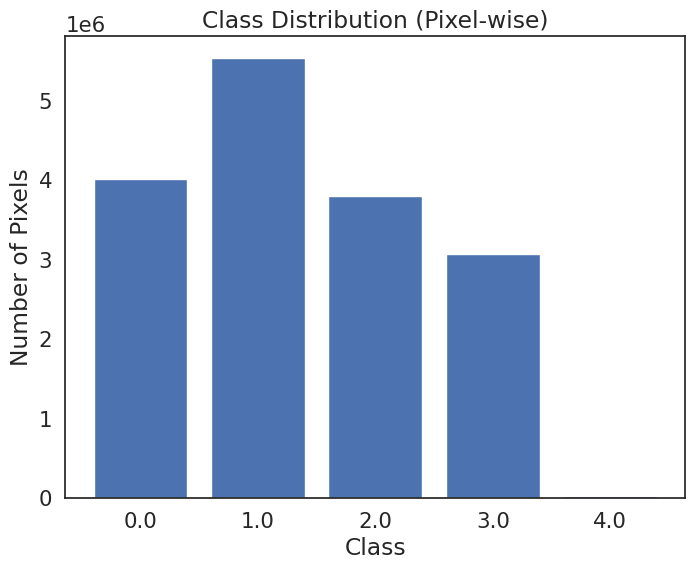

In [ ]:
def plot_class_distribution(y_train):

    # Flatten the labels (maschere) in modo che siano una lunga lista di pixel
    flattened_labels = y_train.flatten()

    # Calcola la frequenza di ciascuna classe
    unique, counts = np.unique(flattened_labels, return_counts=True)

    # Visualizza la distribuzione
    plt.figure(figsize=(8, 6))
    plt.bar(unique, counts, tick_label=unique)
    plt.xlabel('Class')
    plt.ylabel('Number of Pixels')
    plt.title('Class Distribution (Pixel-wise)')
    plt.show()



# Esegui la funzione passando le etichette di addestramento (y_train)
plot_class_distribution(y_train)

In [ ]:
def calculate_class_percentages(y_train):

    # Flatten the labels (maschere) in modo che siano una lunga lista di pixel
    flattened_labels = y_train.flatten()

    # Calcola la frequenza di ciascuna classe (ad esempio, classi da 0 a num_classes-1)
    unique, counts = np.unique(flattened_labels, return_counts=True)

    # Calcola la percentuale di ciascuna classe
    total_pixels = flattened_labels.size
    percentages = (counts / total_pixels) * 100

    # mostra la distribuzione in percentuale
    for c, p in zip(unique, percentages):
        print(f"Class {c}: {p:.2f}% of total pixels")



# Esegui la funzione passando le etichette di addestramento (y_train)
calculate_class_percentages(y_train)

## Data augmentation

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
y_train = np.expand_dims(y_train, axis=-1)
x_val = np.expand_dims(x_val, axis=-1)
y_val = np.expand_dims(y_val, axis=-1)

print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(2004, 64, 128, 1) (2004, 64, 128, 1) (501, 64, 128, 1) (501, 64, 128, 1)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_data_gen_args = dict(
                     width_shift_range=0.15,
                     height_shift_range=0.15,
                     zoom_range=0.2,
                     horizontal_flip=True,
                     fill_mode='reflect')

mask_data_gen_args = dict(
                     width_shift_range=0.15,
                     height_shift_range=0.15,
                     zoom_range=0.2,
                     horizontal_flip=True,
                     fill_mode='reflect',
                     preprocessing_function = lambda x: np.round(x).astype(x.dtype))

In [ ]:
# images
image_data_generator = ImageDataGenerator(**img_data_gen_args)
image_data_generator.fit(x_train, augment=True, seed=seed)

image_generator = image_data_generator.flow(x_train, seed=seed)

# masks
mask_data_generator = ImageDataGenerator(**mask_data_gen_args)
mask_data_generator.fit(y_train, augment=True, seed=seed)
mask_generator = mask_data_generator.flow(y_train, seed=seed)


def my_image_mask_generator(image_generator, mask_generator):
    train_generator = zip(image_generator, mask_generator)
    for (img, mask) in train_generator:
        yield (img, mask)

my_generator = my_image_mask_generator(image_generator, mask_generator)


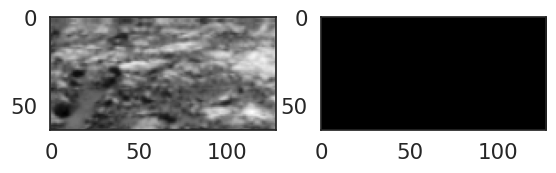

In [ ]:
# code to check how the augmentation is working on the images and masks
x = next(image_generator)
y = next(mask_generator)

for i in range(0,1):
    image = x[i]
    mask = y[i]
    plt.subplot(1,2,1)
    plt.imshow(image[:,:,0], cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(mask[:,:,0], cmap='gray')
    plt.show()

## Let's try class weights to mitigate the effect of class imbalance

In [ ]:
# Flatten le maschere in modo che siano una lunga lista di pixel
flattened_labels = y_train.flatten()

# Calcola la frequenza di ciascuna classe
unique, counts = np.unique(flattened_labels, return_counts=True)

class_frequencies = counts / len(flattened_labels)

# Calcolare i pesi come l'inverso delle frequenze
weights = 1.0 / class_frequencies

# Normalizzare i pesi
weights_normalized = weights / np.sum(weights)

# Visualizza i pesi normalizzati per ciascuna classe
for class_id, weight in zip(unique, weights_normalized):
    print(f"Class {class_id}: normalized weight {weight:.4f}")

Class 0.0: normalized weight 0.0052
Class 1.0: normalized weight 0.0038
Class 2.0: normalized weight 0.0053
Class 3.0: normalized weight 0.0071
Class 4.0: normalized weight 0.9786


In [ ]:
weights_normalized[0] = 0.0
weights_normalized

array([0.        , 0.00377298, 0.00531845, 0.00705449, 0.97860952])

# Model

In [ ]:
# Modifica la forma per aggiungere il canale (1) per le immagini in scala di grigi

input_shape = x_train.shape[1:]
NUM_CLASSES = 5
BATCHSIZE = 16

print("Input shape:", input_shape)
print("num_classes", NUM_CLASSES)

Input shape: (64, 128, 1)
num_classes 5


## Custom loss function definition

In [ ]:
# Funzione di perdita ponderata personalizzata
def weighted_sparse_categorical_crossentropy(weights):
    def loss(y_true, y_pred):
        # Applica i pesi alle classi
        weights_tensor = tf.constant(weights, dtype=tf.float32)

        # Converte y_true a un array 1D (necessario per l'indice)
        y_true_flat = tf.reshape(y_true, [-1])
        y_pred_flat = tf.reshape(y_pred, [-1, tf.shape(y_pred)[-1]])

        # Calcola la cross-entropy standard
        ce = tf.keras.losses.sparse_categorical_crossentropy(y_true_flat, y_pred_flat)

        # Applica i pesi ai pixel
        pixel_weights = tf.gather(weights_tensor, tf.cast(y_true_flat, tf.int32))
        weighted_ce = ce * pixel_weights

        # Restituisce la perdita media
        return tf.reduce_mean(weighted_ce)

    return loss

In [ ]:
# Funzione per creare un blocco UNet
def unet_block(input_tensor, filters, kernel_size=3, activation='relu', stack=2, dropout_rate=0.0, name=''):

    x = input_tensor

    # Apply a sequence of Conv2D, Batch Normalisation, and Activation layers
    for i in range(stack):
        x = tfkl.Conv2D(filters, kernel_size=kernel_size, padding='same', name=name + 'conv' + str(i + 1))(x)
        x = tfkl.BatchNormalization(name=name + 'bn' + str(i + 1))(x)
        x = tfkl.Activation(activation, name=name + 'activation' + str(i + 1))(x)

    # Apply Dropout, if specified
    if dropout_rate > 0.0:
        x = tfkl.Dropout(dropout_rate, name=name + 'dropout')(x)

    return x

### Idea of channel attention:
#### Channel Attention is a technique used in deep learning models to enhance feature representation by analyzing and assigning greater importance to the most relevant channels of the input tensor. Simply put, it enables the model to "focus" on the most critical information while ignoring less relevant details at the channel level

In [ ]:
# Modulo di attenzione (Channel Attention)
def channel_attention(input_tensor, filters):
    """
    Applica Channel Attention con pesi trainabili per ponderare l'importanza del tensore originale
    e della mappa di attenzione.
    """
    # Global Average Pooling (riduzione spaziale)
    avg_pool = tfkl.GlobalAveragePooling2D()(input_tensor)

    # Bottleneck (Riduzione e Ripristino dei Canali)
    avg_pool = tfkl.Dense(filters // 16, activation='relu')(avg_pool)
    avg_pool = tfkl.Dense(filters, activation='sigmoid')(avg_pool)

    # Reshape per creare una maschera (1, 1, C)
    avg_pool = tfkl.Reshape((1, 1, filters))(avg_pool)

    # Creazione di pesi trainabili
    weight_x = tf.Variable(0.5, trainable=True, name='weight_x')
    weight_attention = tf.Variable(0.5, trainable=True, name='weight_attention')

    # Calcolo della mappa di attenzione ponderata
    attention_output = tfkl.Multiply()([input_tensor, avg_pool])

    # Fusione dei pesi tra input originale e attenzione
    output = tfkl.Add()([
        weight_x * input_tensor,
        weight_attention * attention_output
    ])

    return output

In [ ]:
# Funzione per definire il modello
def unet_aff(input_shape=(64, 128, 1), num_classes=NUM_CLASSES, depth=3, num_filters=32, kernel_size=3, activation='relu', dropout_rate=0.0):
    input_layer = tfkl.Input(shape=input_shape, name="input_layer")

    """Downsampling path """
    skips = []
    x = input_layer
    for i in range(depth):  # Profondità della rete
        x = unet_block(x, num_filters * (2**i), kernel_size, activation, name=f"down_block_{i}")
        skips.append(x)
        x = tfkl.MaxPooling2D()(x)

    """Bottleneck"""
    x = unet_block(x, num_filters * (2**depth), kernel_size, activation, name="bottleneck")

    """Upsampling path"""
    for i in reversed(range(depth)):
        x = tfkl.UpSampling2D()(x)

        skip_with_attention = channel_attention(skips[i], num_filters * (2**i))
        x = tfkl.Concatenate()([x, skip_with_attention])
        x = unet_block(x, num_filters * (2**i), kernel_size, activation, name=f"up_block_{i}")

    # Output layer
    output_layer = tfkl.Conv2D(num_classes, 1, padding="same", activation="softmax")(x)
    return tf.keras.Model(inputs=input_layer, outputs=output_layer)

## Metric and callback


In [ ]:
# Visualization callback: very useful because it allows us to plot, during the training, the ground truth and the actual prediction


class VizCallback(tf.keras.callbacks.Callback):
    def __init__(self, image, label, frequency=10, num_classes=NUM_CLASSES):

        """
        Callback per visualizzare le predizioni di segmentazione durante l'allenamento.

        Parameters:
        - image: immagine di input (forma: (64, 128) o (64, 128, 1)).
        - label: maschera di verità a terra associata (stessa forma dell'immagine in altezza/larghezza).
        - frequency: frequenza di visualizzazione delle predizioni (ogni 'frequency' epoche).
        - num_classes: numero di classi di segmentazione (per colormap).
        """

        super().__init__()
        self.image = image  # Immagine specifica
        self.label = label  # Maschera specifica
        self.frequency = frequency
        self.num_classes = num_classes

        # Preprocessa l'immagine per assicurare la corretta forma

        if len(self.image.shape) == 2:  # Se l'immagine è in scala di grigi (64, 128)
            self.image = np.expand_dims(self.image, axis=-1)  # Aggiungi il canale (64, 128, 1)



    def on_epoch_end(self, epoch, logs=None):
        if epoch % self.frequency == 0:  # Visualizza ogni "frequency" epoche
            # Prepara l'immagine per il modello: aggiungi batch dimension
            image_input = tf.expand_dims(self.image, axis=0)  # (1, 64, 128, 1)

            # Predizione del modello
            pred = self.model.predict(image_input, verbose=0)  # (1, 64, 128, num_classes)
            y_pred = tf.math.argmax(pred, axis=-1).numpy().squeeze()  # Predizione finale (64, 128)

            # Visualizzazione
            plt.figure(figsize=(16, 4))

            # Input image
            plt.subplot(1, 3, 1)
            plt.imshow(self.image.squeeze(), cmap='gray')  # Visualizza l'immagine in scala di grigi
            plt.title("Input Image")
            plt.axis('off')

            # Ground truth
            plt.subplot(1, 3, 2)
            plt.imshow(self.label,  cmap='gray', vmin=0, vmax=self.num_classes - 1)
            plt.title("Ground Truth Mask")
            plt.axis('off')



            # Predicted mask
            plt.subplot(1, 3, 3)
            plt.imshow(y_pred, cmap='gray', vmin=0, vmax=self.num_classes - 1)
            plt.title("Predicted Mask")
            plt.axis('off')

            plt.tight_layout()
            plt.show()
            plt.close()


In [ ]:
# Qui si possono passare i parametri che si vogliono e crea una UNET con quelle caratteristiche
best_model = unet_aff(
    input_shape=(64, 128, 1),
    num_classes=NUM_CLASSES,
    depth=6,
    num_filters=32,
    kernel_size=5,
    activation='relu',
    dropout_rate=0.36810766475875323
)

In [ ]:
best_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 64, 128,   │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ down_block_0conv1   │ (None, 64, 128,   │        832 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ down_block_0bn1     │ (None, 64, 128,   │        128 │ down_block_0conv… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ down_block_0activa… │ (None, 64, 128,   │          0 │ down_block_0bn1[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ down_block_0conv2   │ (None, 64, 128,   │     25,632 │ down_block_0acti… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ down_block_0bn2     │ (None, 64, 128,   │        128 │ down_block_0conv… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ down_block_0activa… │ (None, 64, 128,   │          0 │ down_block_0bn2[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 32, 64,    │          0 │ down_block_0acti… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ down_block_1conv1   │ (None, 32, 64,    │     51,264 │ max_pooling2d[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ down_block_1bn1     │ (None, 32, 64,    │        256 │ down_block_1conv… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ down_block_1activa… │ (None, 32, 64,    │          0 │ down_block_1bn1[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ down_block_1conv2   │ (None, 32, 64,    │    102,464 │ down_block_1acti… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ down_block_1bn2     │ (None, 32, 64,    │        256 │ down_block_1conv… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ down_block_1activa… │ (None, 32, 64,    │          0 │ down_block_1bn2[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 16, 32,    │          0 │ down_block_1acti… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ down_block_2conv1   │ (None, 16, 32,    │    204,928 │ max_pooling2d_1[… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ down_block_2bn1     │ (None, 16, 32,    │        512 │ down_block_2conv

 Total params: 349,704,227 (1.30 GB)

 Trainable params: 349,679,907 (1.30 GB)

 Non-trainable params: 24,320 (95.00 KB)

In [ ]:
best_model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.0006920581654153721),
    loss= weighted_sparse_categorical_crossentropy(weights_normalized),
    metrics=[tfk.metrics.MeanIoU(num_classes=NUM_CLASSES, ignore_class=0, sparse_y_pred=False , name="mean_io_u")]
)

early_stopping_best = tf.keras.callbacks.EarlyStopping(
    monitor='val_mean_io_u',
    mode='max',
    patience=100,
    restore_best_weights=True
)

# Addestra il modello
history_best = best_model.fit(
    my_generator,
    validation_data=(x_val, y_val),
    steps_per_epoch = len(x_train) // BATCHSIZE,
    validation_steps = len(y_train) // BATCHSIZE,
    epochs=500,
    verbose=1,
    callbacks=[early_stopping_best]
).history


Epoch 1/500


I0000 00:00:1734085284.987573     107 service.cc:145] XLA service 0x78b6f40044e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734085284.987625     107 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1734085310.574215     107 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_slice_fusion_3', 32 bytes spill stores, 32 bytes spill loads

I0000 00:00:1734085310.612836     107 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - loss: 0.0078 - mean_io_u: 0.1309

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


125/125 ━━━━━━━━━━━━━━━━━━━━ 111s 553ms/step - loss: 0.0078 - mean_io_u: 0.1310 - val_loss: 0.0151 - val_mean_io_u: 0.1164
Epoch 2/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 266ms/step - loss: 0.0056 - mean_io_u: 0.1680 - val_loss: 0.0157 - val_mean_io_u: 0.0657
Epoch 3/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 280ms/step - loss: 0.0056 - mean_io_u: 0.1990 - val_loss: 0.0095 - val_mean_io_u: 0.1812
Epoch 4/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 265ms/step - loss: 0.0049 - mean_io_u: 0.2679 - val_loss: 0.0242 - val_mean_io_u: 0.0391
Epoch 5/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 264ms/step - loss: 0.0060 - mean_io_u: 0.2324 - val_loss: 0.0068 - val_mean_io_u: 0.1655
Epoch 6/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 264ms/step - loss: 0.0045 - mean_io_u: 0.2687 - val_loss: 0.0152 - val_mean_io_u: 0.0123
Epoch 7/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 280ms/step - loss: 0.0051 - mean_io_u: 0.2375 - val_loss: 0.0054 - val_mean_io_u: 0.2271
Epoch 8/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 265ms/step - loss: 0.0046 - 

'\naugmented_train_dataset,\n    validation_data=(x_val, y_val),\n    epochs=1000, \n    verbose=1,\n    callbacks=[early_stopping_best] #iou_callback\n'

In [ ]:
# Calculate and print the final validation accuracy
final_val_meanIoU = round(max(history_best['val_mean_io_u'])* 100, 2)
print(f'Final validation Mean Intersection Over Union: {final_val_meanIoU}%')

Final validation Mean Intersection Over Union: 72.46%


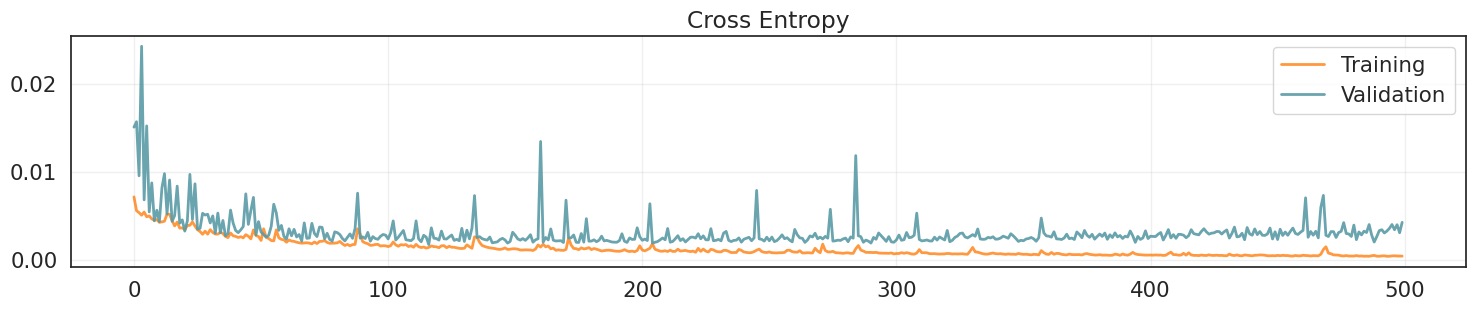

In [ ]:
# Plot and display training and validation loss

plt.figure(figsize=(18, 3))
plt.plot(history_best['loss'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=2)
plt.plot(history_best['val_loss'], label='Validation', alpha=0.9, color='#5a9aa5', linewidth=2)
plt.title('Cross Entropy')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

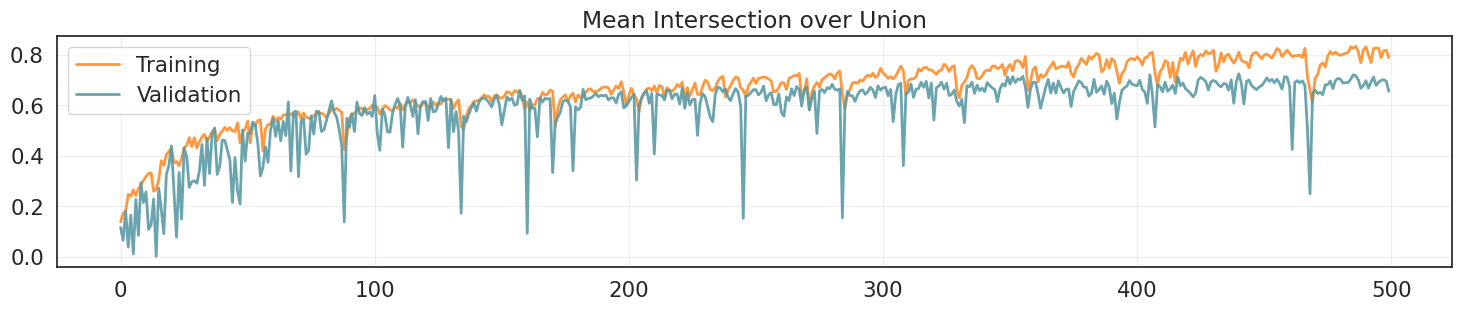

In [ ]:
# Plot and display training and validation mean IoU

plt.figure(figsize=(18, 3))
plt.plot(history_best['mean_io_u'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=2)
plt.plot(history_best['val_mean_io_u'], label='Validation', alpha=0.9, color='#5a9aa5', linewidth=2)
plt.title('Mean Intersection over Union')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
from datetime import datetime

timestep_str = datetime.now().strftime("%y%m%d_%H%M%S")
model_filename = f"model_{timestep_str}.keras"
#best_model.save(model_filename)

# del model

print(f"Model saved to {model_filename}")

Model saved to model_241213_145920.keras


# Prepare submission

### Anzichè salvare il modello e ricaricarlo, puoi semplicemente usare il modello su cui hai fatto fit, così si evitano errori nel loading

In [ ]:
model = tfk.models.load_model('/kaggle/working/model_241201_143800.keras', compile=False) # compile=False with custom metric

Model loaded from model_241201_143800.keras


In [ ]:
## qui devo compilare se metto compile false qui sopra in accordo con le cose custom utilizzate
model.compile(optimizer='adam',
              loss=weighted_sparse_categorical_crossentropy(weights_normalized),
              metrics=[tfk.metrics.MeanIoU(num_classes=NUM_CLASSES, ignore_class=0, sparse_y_pred=False)]
             )
print(f"Model compiled")

In [ ]:
preds = best_model.predict(x_test)
preds = np.argmax(preds, axis=-1)

print(f"Predictions shape: {preds.shape}")

314/314 ━━━━━━━━━━━━━━━━━━━━ 28s 82ms/step
Predictions shape: (10022, 64, 128)


In [ ]:
def y_to_df(y) -> pd.DataFrame:

    """Converts segmentation predictions into a DataFrame format for Kaggle."""

    n_samples = len(y)
    y_flat = y.reshape(n_samples, -1)
    df = pd.DataFrame(y_flat)
    df["id"] = np.arange(n_samples)
    cols = ["id"] + [col for col in df.columns if col != "id"]
    return df[cols]

In [ ]:
# Create and download the csv submission file
timestep_str = model_filename.replace("model_", "").replace(".keras", "")
submission_filename = f"submission_72_46{timestep_str}.csv"
submission_df = y_to_df(preds)
submission_df.to_csv(submission_filename, index=False)

#from google.colab import files
#files.download(submission_filename)